<a href="https://colab.research.google.com/github/tanmaymaloo/CNN_TimeSeriesAnalysis/blob/main/LSTM_on_tataQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
cd gdrive/MyDrive/BTP/

[Errno 2] No such file or directory: 'gdrive/MyDrive/BTP/'
/content/gdrive/MyDrive/BTP


In [9]:
ls


BTP_2020.gslides  X.txt  y.txt


In [53]:
load_original_y = np.loadtxt("y.txt") 
load_original_y=load_original_y.reshape(load_original_y.shape[0],1)
np.shape(load_original_y)

(2606, 1)

In [54]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled_y = sc.fit_transform(load_original_y[:2400])

In [55]:
for i in range(10):
  print(train_scaled_y[i],load_original_y[i])

[0.84263959] [83.2]
[0.83756345] [83.]
[0.83248731] [82.8]
[0.77411168] [80.5]
[0.80456853] [81.7]
[0.82233503] [82.4]
[0.78680203] [81.]
[0.78172589] [80.8]
[0.79949239] [81.5]
[0.81725888] [82.2]


In [56]:
X_train = []
y_train = []
for i in range(60, np.size(train_scaled_y)):
    X_train.append(train_scaled_y[i-60:i, 0])
    y_train.append(train_scaled_y[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [57]:
np.shape(X_train)

(2340, 60)

In [58]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [60]:
# Initialising the RNN
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
regressor = Sequential()

In [61]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
74/74 [==============================] - 5s 14ms/step - loss: 0.1547
Epoch 2/100
74/74 [==============================] - 1s 14ms/step - loss: 0.0126
Epoch 3/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0114
Epoch 4/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0103
Epoch 5/100
74/74 [==============================] - 1s 14ms/step - loss: 0.0115
Epoch 6/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0105
Epoch 7/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0092
Epoch 8/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0101
Epoch 9/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0085
Epoch 10/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0086
Epoch 11/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0086
Epoch 12/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0087
Epoch 13/100
74/74 [=====

In [67]:
test_original_y = load_original_y[2400:]

In [68]:
np.shape(test_original_y)

(206, 1)

In [77]:
inputs = load_original_y[len(load_original_y)-len(test_original_y)-60:]

In [ ]:
inputs.reshape(-1,1)

In [81]:
inputs_scaled = sc.transform(inputs)

In [82]:
for i in range(50):
  print(inputs_scaled[i],inputs[i])

[0.85025381] [83.5]
[0.79949239] [81.5]
[0.83756345] [83.]
[0.81218274] [82.]
[0.84263959] [83.2]
[0.86294416] [84.]
[0.83756345] [83.]
[0.85786802] [83.8]
[0.91370558] [86.]
[0.86294416] [84.]
[0.90101523] [85.5]
[0.80203046] [81.6]
[0.73604061] [79.]
[0.76142132] [80.]
[0.78680203] [81.]
[0.81725888] [82.2]
[0.84517766] [83.3]
[0.83502538] [82.9]
[0.7715736] [80.4]
[0.73604061] [79.]
[0.71573604] [78.2]
[0.73096447] [78.8]
[0.76649746] [80.2]
[0.8248731] [82.5]
[0.87309645] [84.4]
[0.9035533] [85.6]
[0.90862944] [85.8]
[0.83756345] [83.]
[0.85025381] [83.5]
[0.83756345] [83.]
[0.85786802] [83.8]
[0.87817259] [84.6]
[0.88832487] [85.]
[0.87563452] [84.5]
[0.88071066] [84.7]
[0.85786802] [83.8]
[0.86294416] [84.]
[0.83756345] [83.]
[0.84771574] [83.4]
[0.86294416] [84.]
[0.85025381] [83.5]
[0.84517766] [83.3]
[0.82994924] [82.7]
[0.79441624] [81.3]
[0.81725888] [82.2]
[0.85279188] [83.6]
[0.79187817] [81.2]
[0.86294416] [84.]
[0.88324873] [84.8]
[0.88832487] [85.]


In [ ]:
inputs[0:100]

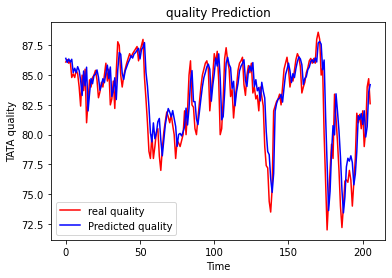

In [158]:
X_test = []
for i in range(60, len(inputs_scaled)):
    X_test.append(inputs_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_quality = regressor.predict(X_test)
predicted_quality = sc.inverse_transform(predicted_quality)

# Visualising the results
plt.plot(inputs[60:], color = 'red', label = 'real quality')
plt.plot(predicted_quality, color = 'blue', label = 'Predicted quality')
plt.title('quality Prediction')
plt.xlabel('Time')
plt.ylabel('TATA quality')
plt.legend()
plt.show()

In [160]:
for i in range(len(predicted_quality)):
  print(predicted_quality[i], inputs[60+i])

[86.40768] [86.1]
[86.06381] [86.3]
[86.35286] [86.]
[86.097244] [86.2]
[86.331024] [84.8]
[85.20631] [85.1]
[85.579155] [84.8]
[85.216286] [85.4]
[85.709946] [85.1]
[85.37844] [84.]
[84.562126] [82.4]
[83.288475] [85.]
[85.34406] [83.7]
[84.109474] [85.5]
[85.66722] [81.]
[81.99338] [82.8]
[83.457794] [84.6]
[84.70673] [84.]
[84.279976] [84.8]
[84.97733] [85.]
[85.063156] [85.4]
[85.435974] [84.6]
[84.82734] [83.1]
[83.73065] [83.6]
[84.16038] [84.4]
[84.69906] [84.]
[84.359146] [85.]
[85.1706] [86.]
[85.838524] [84.5]
[84.71118] [85.5]
[85.68072] [82.5]
[83.203804] [83.]
[83.727264] [84.5]
[84.77659] [82.2]
[82.94707] [85.3]
[85.432] [87.8]
[86.89569] [87.5]
[86.74942] [85.]
[85.14515] [84.]
[84.63442] [84.9]
[85.345795] [85.5]
[85.67776] [86.]
[86.03278] [86.4]
[86.312904] [86.8]
[86.63293] [86.5]
[86.43314] [86.8]
[86.77404] [87.]
[86.897766] [87.2]
[87.088] [87.4]
[87.25291] [86.2]
[86.3608] [87.]
[87.16131] [87.5]
[87.32476] [88.]
[87.73042] [84.8]
[85.24269] [83.]
[84.08129] [81